# Inferential statistics II - Bootstrapping

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [2]:
med_charges = pd.read_csv('data/insurance2.csv')

In [3]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [55]:
np.random.seed(47)
N_rep = 10000
bs_replicates = np.empty(N_rep)                                                 # created an empty array for the replicates
for i in range(N_rep):                                                          # iterating through the range of the length of replicates
    bs_sample = np.random.choice(med_charges.charges, size=(len(med_charges)))  # resampling with replacement 
    bs_replicates[i] = np.mean(bs_sample)                                       # mean of the bootstrap samples
conf_int = np.percentile(bs_replicates, [5])                                    # 95% onfidence interval 
print('Lower limit: ' + str(conf_int))

Lower limit: [12724.4679217]


Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__  Null Hypothesis - There is no difference in the standard deviations between the insured and the uninsured.

Alternative Hypothesis - There are differences in the standard deviations between the insured and unisured.

In [62]:
insured = med_charges[med_charges.insuranceclaim == 1]['charges']          # Selected insured 
uninsured = med_charges[med_charges.insuranceclaim == 0]['charges']         # Selected uninsured

std_in = np.std(insured)
std_un = np.std(uninsured)
diff_of_std = std_in - std_un

mix_data = np.concatenate((insured, uninsured)) 
mix_data_std = np.std(mix_data)
in_shifted = insured - np.std(insured) + mix_data_std
un_shifted = uninsured - np.std(uninsured) + mix_data_std

print('Difference in std: ' + str(diff_of_std))

Difference in std: 7596.256408655178


In [58]:
np.random.seed(47)
bs_replicates_std = np.empty(10000)
for i in range(10000):
    bs_sample_in = np.random.choice(in_shifted, len(insured))
    bs_sample_un = np.random.choice(un_shifted, len(uninsured))
    bs_replicates_std[i] = np.std(bs_sample_in) - np.std(bs_sample_un)

conf_int_std = np.percentile(bs_replicates_std, [2.5, 97.5])
print(conf_int_std)
    

[6681.572467   8502.74820416]


C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


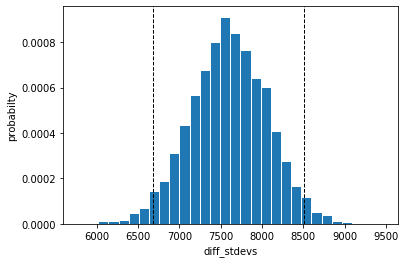

In [60]:
_ = plt.hist(bs_replicates_std, bins= 30, normed=True, edgecolor='white')
_ = plt.xlabel('diff_stdevs')
_ = plt.ylabel('probabilty')
_ = plt.axvline(np.percentile(bs_replicates_std, 2.5), color='k', linestyle='dashed', linewidth=1)
_ = plt.axvline(np.percentile(bs_replicates_std, 97.5), color='k', linestyle='dashed', linewidth=1)


The 95% confidence interval under the null hypothesis is 6681.57 to 8502.75. The observed test statistic we have from the dataset is 7596.26 which is in the confidence interval. We reject the null hypothesis because there is no 0 in the confidence interval.

## Confidence interval and p-value

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__ Null Hypothesis - There is no difference in the mean of the charges of the insured and uninsured. 

Alternative Hypothesis - There is a difference in the mean of the charges - insured and uninsured.

In [72]:
insured = med_charges[med_charges.insuranceclaim == 1]['charges']          # Selected insured 
uninsured = med_charges[med_charges.insuranceclaim == 0]['charges']         # Selected uninsured

mean_in = np.mean(insured)
mean_un = np.mean(uninsured)
diff_of_mean = mean_in - mean_un

mix_data = np.concatenate((insured, uninsured)) 
mix_data_mean = np.mean(mix_data)
in_shifted_m = insured - np.mean(insured) + mix_data_mean
un_shifted_m = uninsured - np.mean(uninsured) + mix_data_mean

print('Difference in mean: ' + str(diff_of_mean))

Difference in mean: 7602.506384231368


In [73]:
np.random.seed(47)
bs_replicates_mean = np.empty(10000)
for i in range(10000):
    bs_sample_in_m = np.random.choice(in_shifted_m, len(insured))
    bs_sample_un_m = np.random.choice(un_shifted_m, len(uninsured))
    bs_replicates_mean[i] = np.mean(bs_sample_in_m) - np.mean(bs_sample_un_m)

In [74]:
p = np.sum(bs_replicates_mean >= diff_of_mean)/len(bs_replicates_mean)
print('P value: ' + str(p))

P value: 0.0


The p-value is very low - almost 0, suggesting that under the null hypothesis, we could not get any value as extreme as the observed difference. This shows that the observed difference is very significant and we reject the null hypothesis. There is a real difference in the mean of the insured versus that of the uninsured.

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__ The difference could be a negative or a positive depending on the direction. So we can have 2 lines on each side, at the same distance from 0.

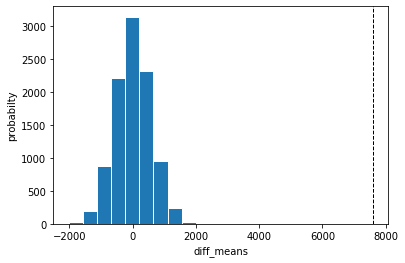

In [70]:
_ = plt.hist(bs_replicates_mean, edgecolor='white')
_ = plt.xlabel('diff_means')
_ = plt.ylabel('probabilty')
_ = plt.axvline(diff_of_mean, color='k', linestyle='dashed', linewidth=1)


__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__ The p-value from the t-test was also very small and suggested a significant difference. Performing the bootstrap replicates helped confirm the observation.

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__ The Welch test for unequal variance showed a higher p value than the normal t-test. We should use this for unequal variance.

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__ In this case, though we would be more interested in the one-tailed test to see if the new algorithm increased the click-through rate compared to the old one, the two sided test would show if there was any decrease in the click-through rate with the new algorithm. 

Null Hypothesis - There is no change in click through rate with the new algorithm or the old and the new algorithms do not show any difference.
Alternative Hypothesis - There is an increase in the click-through rate in the new algorithm (one tailed test)

Real world consequence of rejecting the null hypothesis depends on if we rejected it when it was True or when it was False. 
If we rejected the Null when it was True (Type I error), then it would be an expensive price to pay - spend money, time, effort and other resources to develop an algorithm which really does not do anything. If we rejected it when it was indeed False, then we would be bringing in value in the form of more visibility or business.

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.